# Phenotype Exploration

# 1.  Initial setup steps

## 1a. Prepare environment
Loading packages and functions into R

In [7]:
## none yet!

## 1b. Define input variables


In [2]:
pheno.file <- ("./data/subset_flowering_time_16.csv") # two columns giving ecotypeid and phenotype
accession.pos.file <- ("./data/accession_geo_locations.csv") # 5 columns: ecotypeid, collection location name, country, latitude, and longitude for all accession in the 1001 genomes dataset

## 2.  Distribution of phenotypic values
The trait we will work on together is the flowering time of plants grown at 16 degrees in a growth chamber (it is a subset of a much larger dataset).

Is it sensible to use this data in a mixed linear model GWAS?  Is the trait quantitative?  Is the distribution likely to result in normally-distributed residuals in GWAS?

[1] 200   2

,ecotypeid,flowering_time_16
,<int>,<dbl>
1,770,72.25000
2,801,88.25000
3,991,106.75000
4,1062,68.25000
5,1367,88.75000
6,1853,69.33333


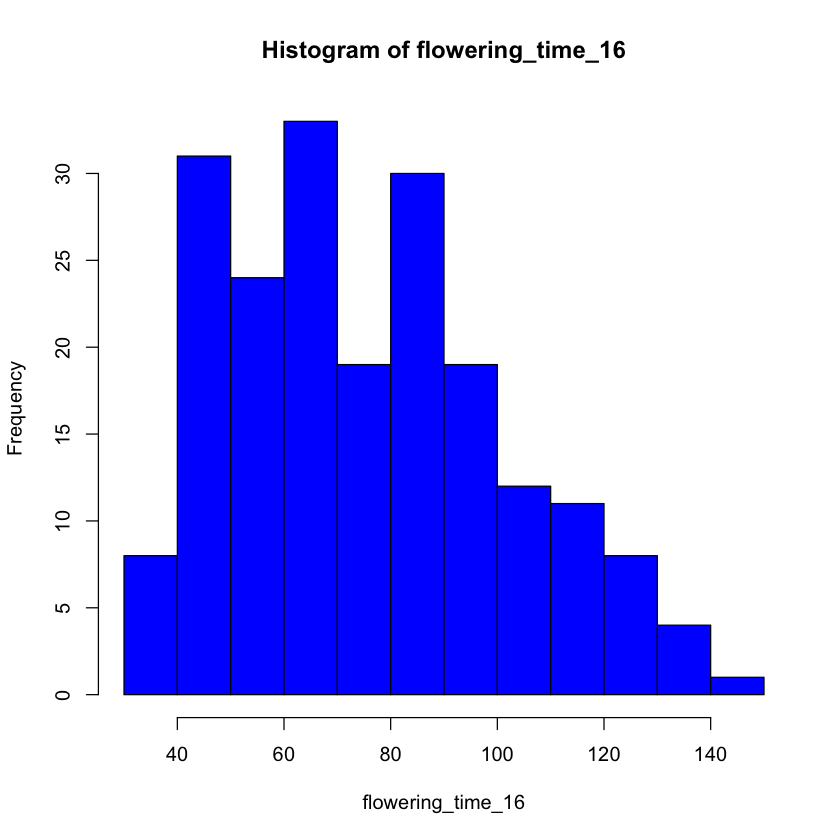

In [3]:
# load phenotype data
pheno <- read.csv(pheno.file)

# check format of data
dim(pheno)
head(pheno)

# make a histogram
pheno.name <- colnames(pheno)[2]
hist(pheno[,2],xlab=pheno.name, main=paste("Histogram of ",pheno.name, sep=""),col="blue")


Although the flowering time data doesn't have a beautiful normal distribution, we would consider it "close enough" to use in GWAS.

## 3.  Geographic distribution of trait values.
How much of a problem will population structure likely be?

In *Arabidopsis thaliana*, population structure is largely associated with geography.  Plotting a phenotype against the latitude and longitude of accession origin can therefore give us an idea of how much p-value inflation to expect due to population structure.

In [4]:
# read in accession origin data
pos <- read.csv(accession.pos.file, stringsAsFactors=TRUE, header=TRUE)
dim(pos)
head(pos)

# merge this data with the phenotype variable
pheno <- merge(pheno, pos)
head(pheno)


[1] 1135    5

,ecotypeid,name,country,latitude,longitude
,<int>,<fct>,<fct>,<dbl>,<dbl>
1,88,CYR,FRA,47.4000,0.683333
2,108,LDV-18,FRA,48.5167,-4.066670
3,139,LDV-46,FRA,48.5167,-4.066670
4,159,MAR2-3,FRA,47.3500,3.933330
5,265,PYL-6,FRA,44.6500,-1.166670
6,350,TOU-A1-88,FRA,46.6667,4.116670


,ecotypeid,flowering_time_16,name,country,latitude,longitude
,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
1,801,88.25000,KYC-33,USA,37.91690,-84.46390
2,991,106.75000,Ale-Stenar-41-1,SWE,55.38226,14.05268
3,1062,68.25000,Brösarp-15-138,SWE,55.71670,14.13330
4,1853,69.33333,MNF-Pot-21,USA,43.59500,-86.26570
5,2016,69.75000,MNF-Pin-39,USA,43.53560,-86.17880
6,4807,87.50000,UKSW06-207,UK,50.40000,-4.90000


[1] "model R-squared = 0.0411826753137495"


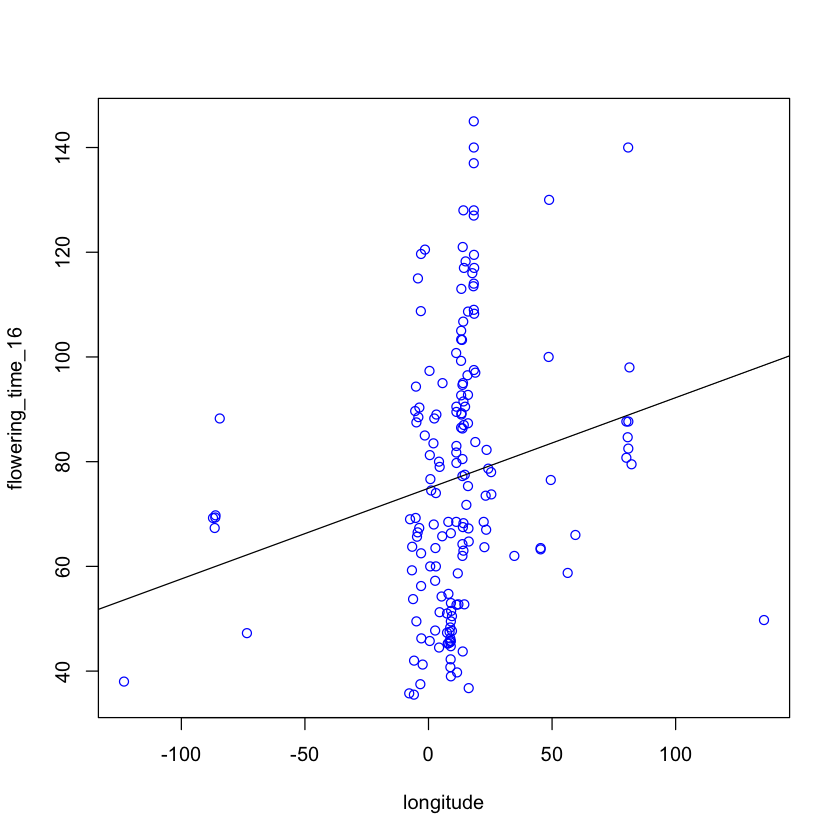

In [5]:
# phenotype relationship with longitude
plot(pheno$longitude, pheno[,colnames(pheno)==pheno.name], xlab="longitude", ylab=pheno.name, col="blue")
abline(lm(pheno[,colnames(pheno)==pheno.name]~pheno$longitude))

# get R-squared of this relationship
rsq <- summary(lm(pheno[,colnames(pheno)==pheno.name]~pheno$longitude))$r.squared
print(paste("model R-squared = ", rsq, sep=""))

[1] "model R-squared = 0.162897613878937"


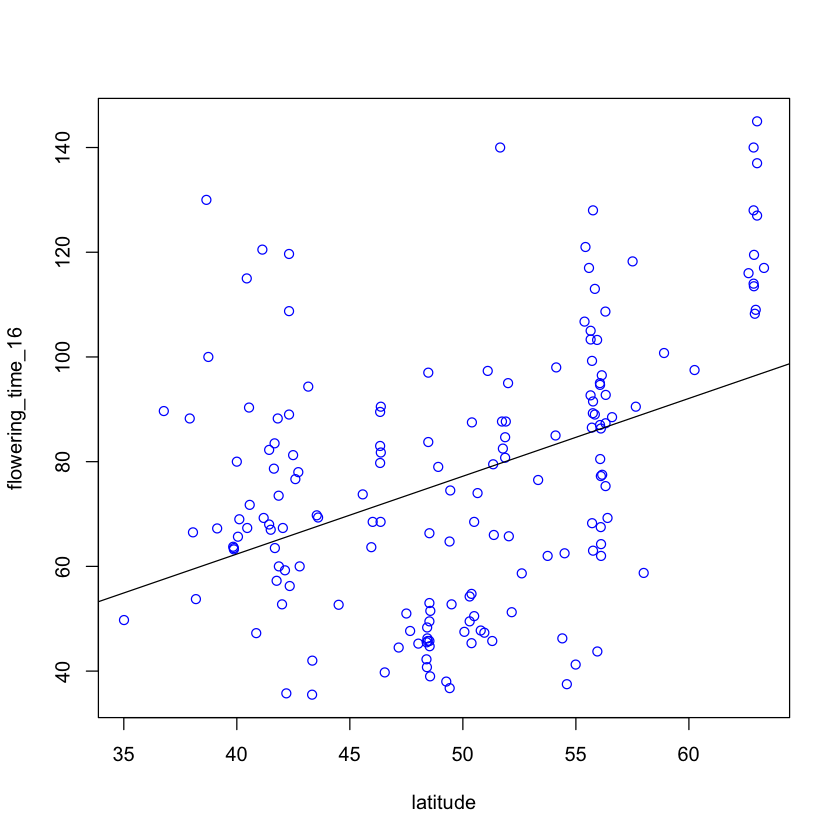

In [6]:
# phenotype relationship with latitude
plot(pheno$latitude, pheno[,colnames(pheno)==pheno.name], xlab="latitude", ylab=pheno.name, col="blue")
abline(lm(pheno[,colnames(pheno)==pheno.name]~pheno$latitude))

# get R-squared of this relationship
rsq <- summary(lm(pheno[,colnames(pheno)==pheno.name]~pheno$latitude))$r.squared
print(paste("model R-squared = ", rsq, sep=""))

 ### Given the strong relationship between flowering time and latitude, I would predict that we will have very strong population structure confounding in our GWAS!  Let's run it and see.
 ## Let's move on to 2_GWAS.ipynb where we will use this phenotype for GWAS.